In [ ]:
# prompt: code to mount drive
# from google.colab import drive
# drive.mount('/content/drive')

In [47]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import community as community_louvain
from networkx.algorithms.community import girvan_newman
from networkx.algorithms import centrality

In [2]:
# Load node data
nodes_df = pd.read_csv("/content/drive/MyDrive/Homogenoeus/Nodes/Nodes.csv")
nodes_index_df = pd.read_csv("/content/drive/MyDrive/Homogenoeus/Nodes/NodesIndex.csv")
node_types_df = pd.read_csv("/content/drive/MyDrive/Homogenoeus/Nodes/Node Types (Product Group and Subgroup).csv")
node_types_plant_storage_df = pd.read_csv("/content/drive/MyDrive/Homogenoeus/Nodes/Nodes Type (Plant & Storage).csv")

# Load edge data
edges_plant_df = pd.read_csv("/content/drive/MyDrive/Homogenoeus/Edges/Edges (Plant).csv")
edges_product_group_df = pd.read_csv("/content/drive/MyDrive/Homogenoeus/Edges/Edges (Product Group).csv")
edges_product_subgroup_df = pd.read_csv("/content/drive/MyDrive/Homogenoeus/Edges/Edges (Product Sub-Group).csv")
edges_storage_location_df = pd.read_csv("/content/drive/MyDrive/Homogenoeus/Edges/Edges (Storage Location).csv")

In [3]:
from IPython.display import display

# Displaying the first 5 rows of each DataFrame
display(nodes_df.head())
display(nodes_index_df.head())
display(node_types_df.head())
display(node_types_plant_storage_df.head())
display(edges_plant_df.head())
display(edges_product_group_df.head())
display(edges_product_subgroup_df.head())
display(edges_storage_location_df.head())

Node
0  SOS008L02P
1  SOS005L04P
2  SOS003L04P
3  SOS002L09P
4  SOS001L12P

Node  NodeIndex
0  SOS008L02P          0
1  SOS005L04P          1
2  SOS003L04P          2
3  SOS002L09P          3
4  SOS001L12P          4

Node Group Sub-Group
0  SOS008L02P     S       SOS
1  SOS005L04P     S       SOS
2  SOS003L04P     S       SOS
3  SOS002L09P     S       SOS
4  SOS001L12P     S       SOS

Node  Plant  Storage Location
0  POV002L09P   2120            2030.0
1  SOS001L12P   2120            2030.0
2  POP002L09P   2120            2030.0
3  POP001L12P   2120            2030.0
4  POP001L12P   2120            2030.0

Plant         node1      node2
0   1901  ATWWP001K24P  ATN01K24P
1   1903        AT5X5K  ATN01K24P
2   1903        AT5X5K  MAR01K24P
3   1903        AT5X5K  SE500G24P
4   1903        AT5X5K   MASR025K

node1       node2 GroupCode
0  SOS008L02P  SOS005L04P         S
1  SOS008L02P  SOS003L04P         S
2  SOS008L02P  SOS002L09P         S
3  SOS008L02P  SOS001L12P         S
4  SOS008L02P  SOS500M24P         S

node1       node2 SubGroupCode
0  SOS008L02P  SOS005L04P          SOS
1  SOS008L02P  SOS003L04P          SOS
2  SOS008L02P  SOS002L09P          SOS
3  SOS008L02P  SOS001L12P          SOS
4  SOS008L02P  SOS500M24P          SOS

Storage Location         node1       node2
0             130.0  ATWWP001K24P   ATN01K24P
1             330.0    SOS005L04P  SOS002L09P
2             330.0    SOS005L04P  SOS003L04P
3             330.0    SOS005L04P  SOS500M24P
4             330.0    SOS005L04P  SOS001L12P

Has attributes

*NODES*

**nodes_df:** Node -> Contains a list of nodes

**nodes_index_df:** Node,NodeIndex

**node_types_df:** Node,Group,Sub-Group ->Contains node classifications as Group and Sub-Group.

**node_types_plant_storage_df:** Node,Plant,Storage Location ->  Categorizes nodes as Plant or Storage Location.

*EDGES*

**edges_plant_df:**Plant,node1,node2 -> Links between plants and products

**edges_product_group_df:**node1,node2,GroupCode ->Links between products within the same group

**edges_product_subgroup_df:**node1,node2,SubGroupCode->Links between products within the same subgroup

**edges_storage_location_df:**Storage Location,node1,node2-> Links between storage locations and products

In [4]:
# # Create a dictionary for node labels
# node_labels = {}

# # Assign labels based on node types
# for _, row in node_types_plant_storage_df.iterrows():
#     if pd.notna(row['Plant']):
#         node_labels[row['Node']] = f"Plant - {row['Plant']}"
#     elif pd.notna(row['Storage Location']):
#         node_labels[row['Node']] = f"Storage - {row['Storage Location']}"

# for _, row in node_types_df.iterrows():
#     if pd.notna(row['Group']):
#         #node_labels[row['Node']] = f"ProdGrp - {row['Group']}"
#         node_labels[row['Node']] = f"{row['Group']}"
#     if pd.notna(row['Sub-Group']):
#         #node_labels[row['Node']] = f"ProdSubgrp - {row['Sub-Group']}"
#         node_labels[row['Node']] = f"{row['Sub-Group']}"

In [25]:
# Function to build and visualize different graphs
def build_graph(edge_df, graph_title):
    G = nx.Graph()

    # Add nodes with labeled attributes
    for node in nodes_df['Node']:
        G.add_node(node, label=node, type='Plant')

    # Add edges
    for _, row in edge_df.iterrows():
        G.add_edge(row['node1'], row['node2'])

    # Draw the graph
    plt.figure(figsize=(10, 8))
    plt.title(graph_title)
    pos = nx.kamada_kawai_layout(G)

    nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'), node_size=500, font_size=8, edge_color="gray")
    plt.show()

    return G


In [17]:
# import networkx as nx
# import matplotlib.pyplot as plt

# def build_graph(edge_df, node_types_df, graph_title):
#     G = nx.Graph()

#     # Identify plants and products
#     # plants = set(node_types_df[node_types_df['Plant'].notna()]['Node'])
#     # products = set(node_types_df[node_types_df['Storage Location'].notna()]['Node'])

#     # Add nodes with categorized labels
#     for node in nodes_df['Node']:
#         if node in node_types_df:
#             G.add_node(node, label=node, type='Plant')
#         elif node in edge_df:
#             G.add_node(node, label=node, type='Product')
#         else:
#             G.add_node(node, label=node, type='Unknown')

#     # Add edges
#     for _, row in edge_df.iterrows():
#         G.add_edge(row['node1'], row['node2'])

#     # Define node colors
#     node_colors = ['green' if G.nodes[n]['type'] == 'Plant' else 'blue' for n in G.nodes]

#     # Draw the graph with better spacing
#     plt.figure(figsize=(12, 10))
#     plt.title(graph_title)
#     pos = nx.kamada_kawai_layout(G)
#      # Adjust layout for better spacing
#     nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
#             node_size=500, font_size=8, node_color=node_colors, edge_color="gray")

#     plt.show()


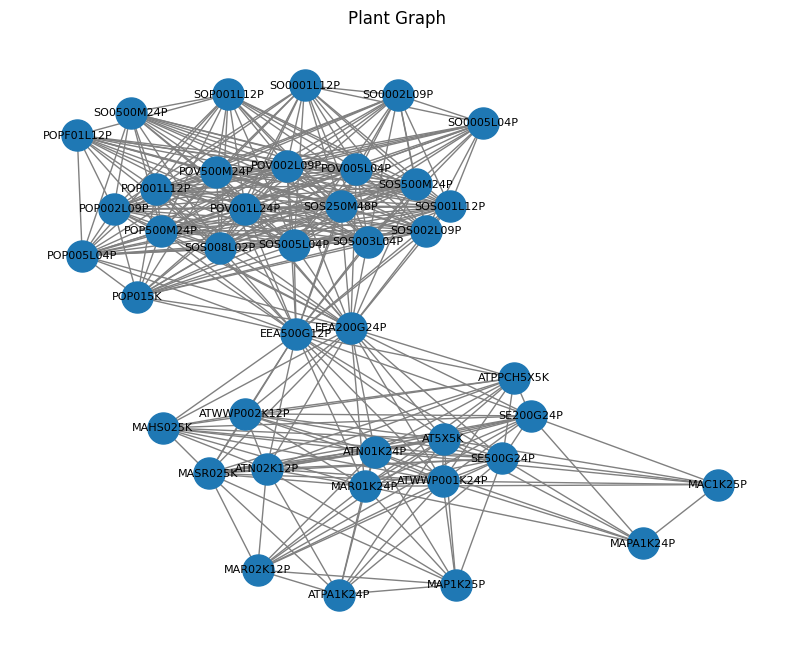

Total Nodes: 40
Total Edges: 360


In [26]:
# Build graphs for different edge types

#Plant Graph
graph_plant = build_graph(edges_plant_df, "Plant Graph")


print(f"Total Nodes: {graph_plant.number_of_nodes()}")
print(f"Total Edges: {graph_plant.number_of_edges()}")
#edges are relation between products and plants as edges

Here it tells about how each products(nodes) are connected via plants as edges

In [14]:
# import networkx as nx
# import matplotlib.pyplot as plt

# def build_graph(edge_df, node_types_df, graph_title):
#     G = nx.Graph()

#     # Identify plants and products
#     plants = set(node_types_df[node_types_df['Plant'].notna()]['Node'])
#     products = set(node_types_df[node_types_df['Storage Location'].notna()]['Node'])

#     # Add nodes with categorized labels
#     for node in nodes_df['Node']:
#         if node in plants:
#             G.add_node(node, label=node, type='Plant')
#         elif node in products:
#             G.add_node(node, label=node, type='Product')
#         else:
#             G.add_node(node, label=node, type='Unknown')

#     # Add edges
#     for _, row in edge_df.iterrows():
#         G.add_edge(row['node1'], row['node2'])

#     # Define node colors
#     node_colors = ['green' if G.nodes[n]['type'] == 'Plant' else 'blue' for n in G.nodes]

#     # Draw the graph with better spacing
#     plt.figure(figsize=(12, 10))
#     plt.title(graph_title)
#     pos = nx.kamada_kawai_layout(G)
#      # Adjust layout for better spacing
#     nx.draw(G, pos, with_labels=True, labels=nx.get_node_attributes(G, 'label'),
#             node_size=500, font_size=8, node_color=node_colors, edge_color="gray")

#     plt.show()
#     return G




In [28]:
# Build and visualize the Plant Graph
#graph_plant = build_graph(edges_plant_df, node_types_plant_storage_df, "Plant Graph")

# Display total nodes and edges
# print(f"Total Nodes: {graph_plant.number_of_nodes()}")
# print(f"Total Edges: {graph_plant.number_of_edges()}")

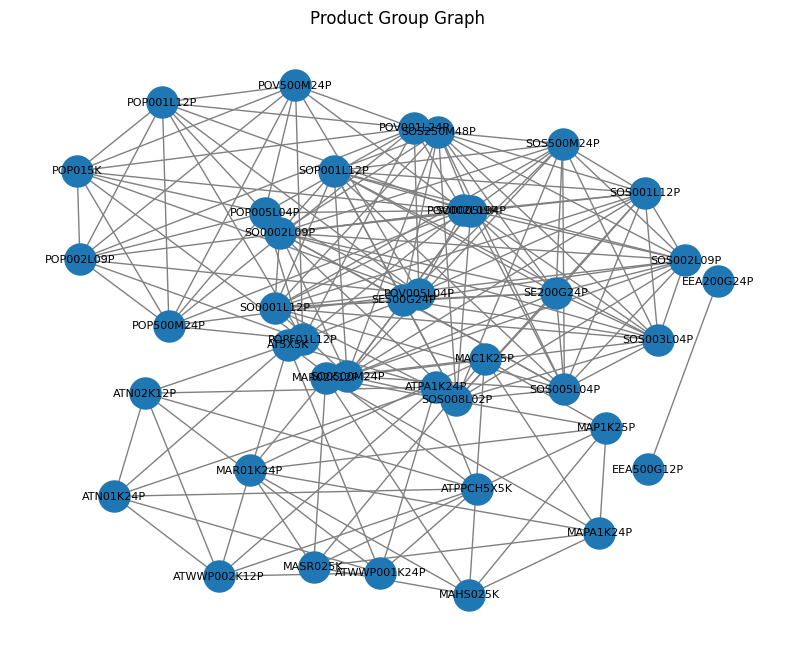

Total Nodes: 40
Total Edges: 179


In [29]:
#Product Group Graph
graph_product_group = build_graph(edges_product_group_df, "Product Group Graph")

print(f"Total Nodes: {graph_product_group.number_of_nodes()}")
print(f"Total Edges: {graph_product_group.number_of_edges()}")

Links Products within the same grp or same group


*   nodes : products
*   edges : belong to same grp



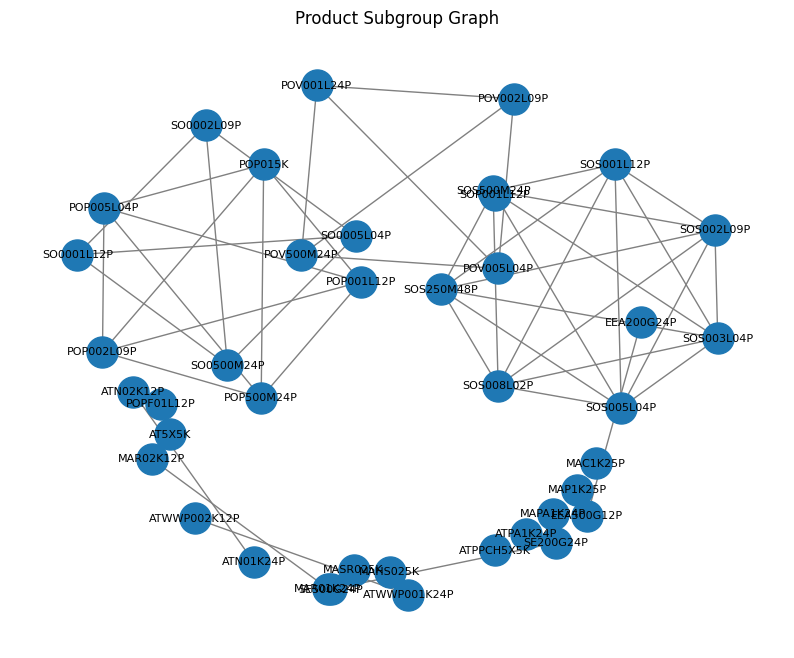

Total Nodes: 40
Total Edges: 48


In [30]:
#Product Subgroup Graph
graph_product_subgroup = build_graph(edges_product_subgroup_df, "Product Subgroup Graph")

print(f"Total Nodes: {graph_product_subgroup.number_of_nodes()}")
print(f"Total Edges: {graph_product_subgroup.number_of_edges()}")


link between products within same sub grp


*   nodes : product
*  edges : same sub group



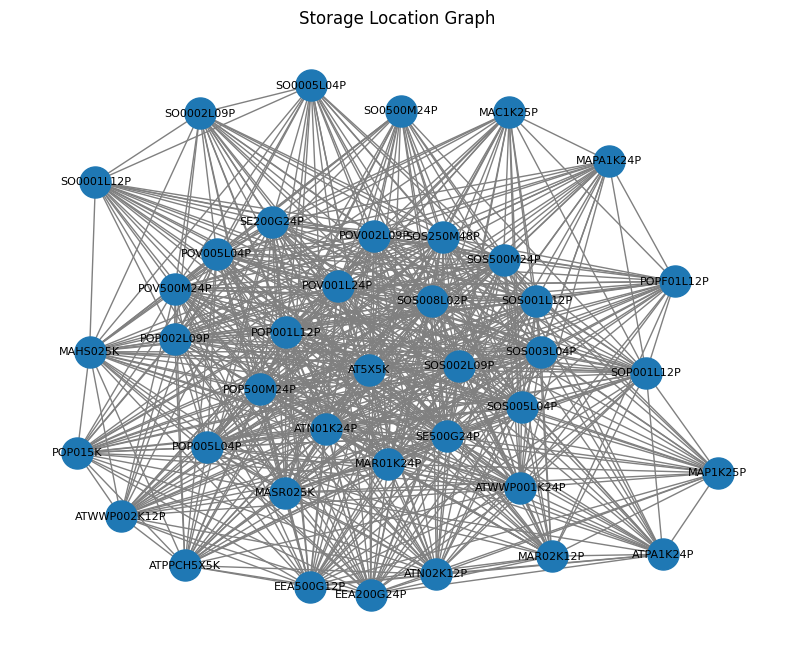

Total Nodes: 40
Total Edges: 665


In [31]:
#Storage Location Graph
graph_storage_location = build_graph(edges_storage_location_df, "Storage Location Graph")

print(f"Total Nodes: {graph_storage_location.number_of_nodes()}")
print(f"Total Edges: {graph_storage_location.number_of_edges()}")

nodes are connected based on storage location(edges)

*   node : products
*   edges: based on storage locations



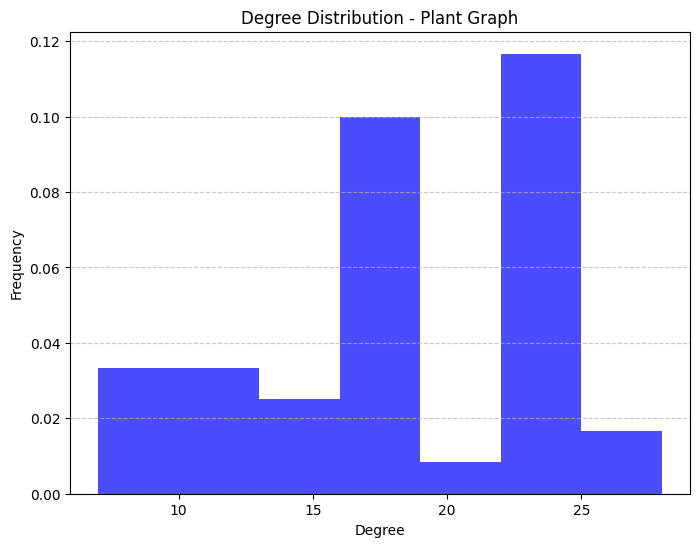

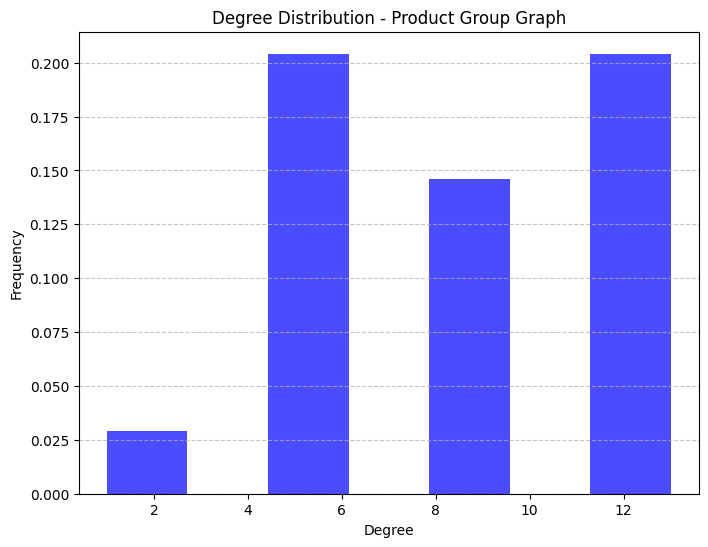

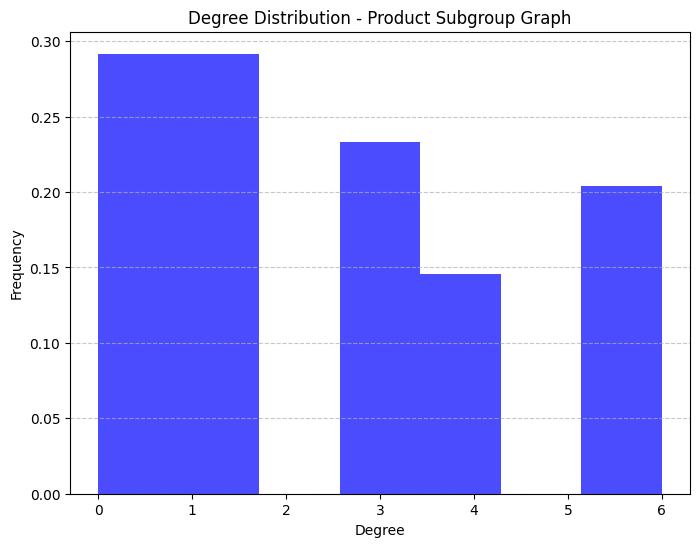

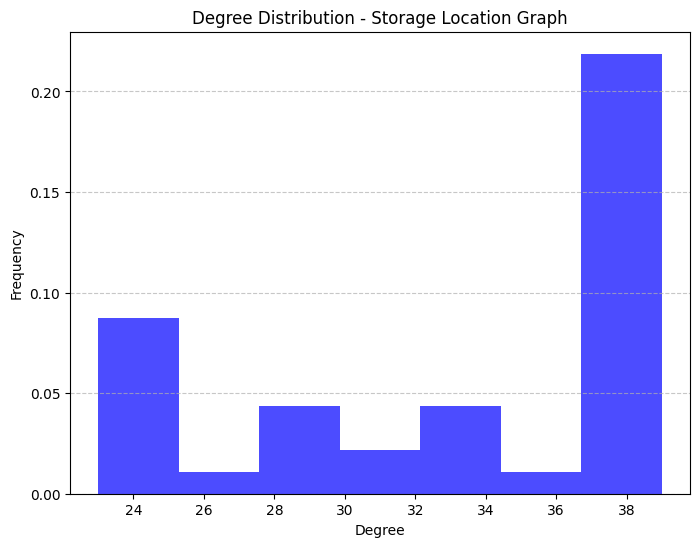

In [32]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def plot_degree_distribution(G, title):
    degrees = [G.degree(n) for n in G.nodes()]
    unique_degrees, counts = np.unique(degrees, return_counts=True)

    plt.figure(figsize=(8, 6))
    #plt.bar(unique_degrees, counts, color='b', alpha=0.7)
    plt.hist(degrees, bins='auto', density=True, color='b', alpha=0.7)  # density=True for curve

    plt.xlabel("Degree")
    plt.ylabel("Frequency")
    plt.title(f"Degree Distribution - {title}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Compute and plot degree distribution for each graph
plot_degree_distribution(graph_plant, "Plant Graph")
plot_degree_distribution(graph_product_group, "Product Group Graph")
plot_degree_distribution(graph_product_subgroup, "Product Subgroup Graph")
plot_degree_distribution(graph_storage_location, "Storage Location Graph")


LOUVAIN COMMUNITY DETECTION

In [76]:
import networkx as nx
import community.community_louvain as community_louvain  # Correct import
import matplotlib.pyplot as plt

def apply_louvain(graph, graph_name):
    # Compute Louvain partition using the correct method
    partition = community_louvain.best_partition(graph, random_state=42)  # Returns a dictionary {node: community_id}

    # Assign community attributes to the nodes
    nx.set_node_attributes(graph, partition, 'community')

    # Extract unique communities and assign colors
    communities = set(partition.values())
    color_map = [partition[node] for node in graph.nodes()]

    # Define layout for visualization
    pos = nx.spring_layout(graph, seed=42)

    plt.figure(figsize=(10, 8))
    plt.title(f"{graph_name} - Louvain Communities")

    # Draw the network with colored nodes
    nx.draw(graph, pos, node_color=color_map, cmap=plt.cm.jet, with_labels=True, node_size=500, font_size=8,edge_color="gray")

    # Save the figure
    plt.savefig(f"{graph_name}_Louvain_communities.png")
    plt.show()

    # Convert partition dictionary to a list of sets (needed for modularity calculation)
    partition_sets = [set() for _ in range(max(partition.values()) + 1)]
    for node, community_id in partition.items():
        partition_sets[community_id].add(node)

    # Compute modularity
    modularity = nx.algorithms.community.quality.modularity(graph, partition_sets)
    print(f"{graph_name} - Modularity Score: {modularity}")

    return modularity, partition


these nodes connecting two communites have inter-plant connections

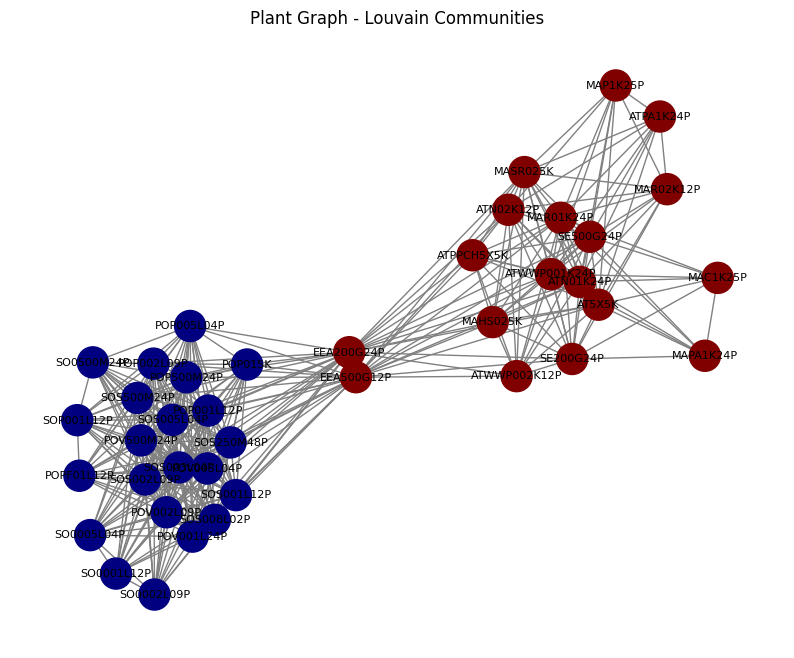

Plant Graph - Modularity Score: 0.37555555555555553


(0.37555555555555553,
 {'SOS008L02P': 0,
  'SOS005L04P': 0,
  'SOS003L04P': 0,
  'SOS002L09P': 0,
  'SOS001L12P': 0,
  'SOS500M24P': 0,
  'SOS250M48P': 0,
  'SOP001L12P': 0,
  'POV005L04P': 0,
  'POV002L09P': 0,
  'POV001L24P': 0,
  'POV500M24P': 0,
  'POP001L12P': 0,
  'POP015K': 0,
  'SO0005L04P': 0,
  'SO0002L09P': 0,
  'SO0001L12P': 0,
  'SO0500M24P': 0,
  'POP005L04P': 0,
  'POP002L09P': 0,
  'POP500M24P': 0,
  'POPF01L12P': 0,
  'AT5X5K': 1,
  'ATN02K12P': 1,
  'ATN01K24P': 1,
  'MAR02K12P': 1,
  'MAR01K24P': 1,
  'ATWWP002K12P': 1,
  'ATWWP001K24P': 1,
  'MASR025K': 1,
  'MAHS025K': 1,
  'SE500G24P': 1,
  'SE200G24P': 1,
  'ATPPCH5X5K': 1,
  'ATPA1K24P': 1,
  'MAPA1K24P': 1,
  'MAP1K25P': 1,
  'MAC1K25P': 1,
  'EEA500G12P': 1,
  'EEA200G24P': 1})

In [77]:
apply_louvain(graph_plant, "Plant Graph")


here communites are based on same product grp, modularity score is high and each community is designed with a number

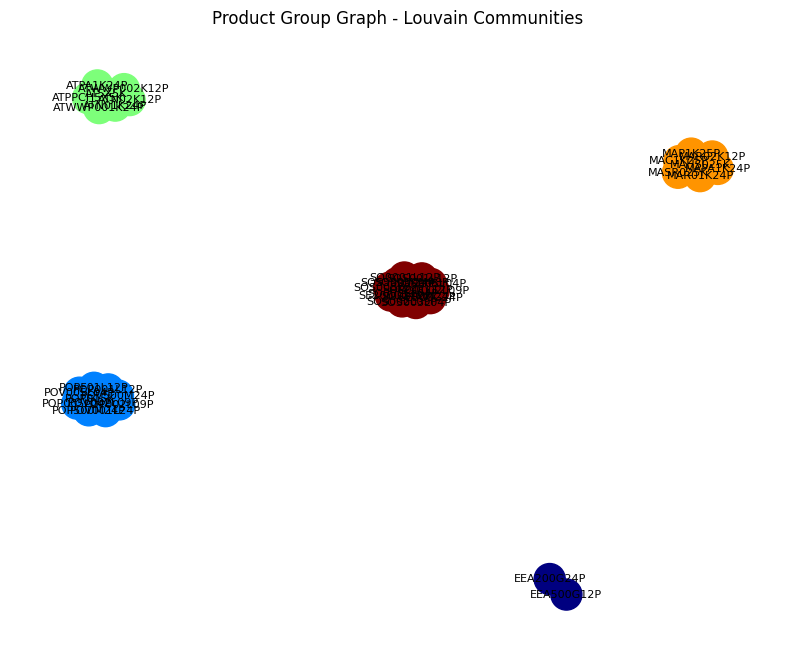

Product Group Graph - Modularity Score: 0.6507911738085577


(0.6507911738085577,
 {'SOS008L02P': 4,
  'SOS005L04P': 4,
  'SOS003L04P': 4,
  'SOS002L09P': 4,
  'SOS001L12P': 4,
  'SOS500M24P': 4,
  'SOS250M48P': 4,
  'SOP001L12P': 4,
  'POV005L04P': 1,
  'POV002L09P': 1,
  'POV001L24P': 1,
  'POV500M24P': 1,
  'POP001L12P': 1,
  'POP015K': 1,
  'SO0005L04P': 4,
  'SO0002L09P': 4,
  'SO0001L12P': 4,
  'SO0500M24P': 4,
  'POP005L04P': 1,
  'POP002L09P': 1,
  'POP500M24P': 1,
  'POPF01L12P': 1,
  'AT5X5K': 2,
  'ATN02K12P': 2,
  'ATN01K24P': 2,
  'MAR02K12P': 3,
  'MAR01K24P': 3,
  'ATWWP002K12P': 2,
  'ATWWP001K24P': 2,
  'MASR025K': 3,
  'MAHS025K': 3,
  'SE500G24P': 4,
  'SE200G24P': 4,
  'ATPPCH5X5K': 2,
  'ATPA1K24P': 2,
  'MAPA1K24P': 3,
  'MAP1K25P': 3,
  'MAC1K25P': 3,
  'EEA500G12P': 0,
  'EEA200G24P': 0})

In [78]:
apply_louvain(graph_product_group, "Product Group Graph")


communities are formed based on subgrp it belongs to, high modularity score observed

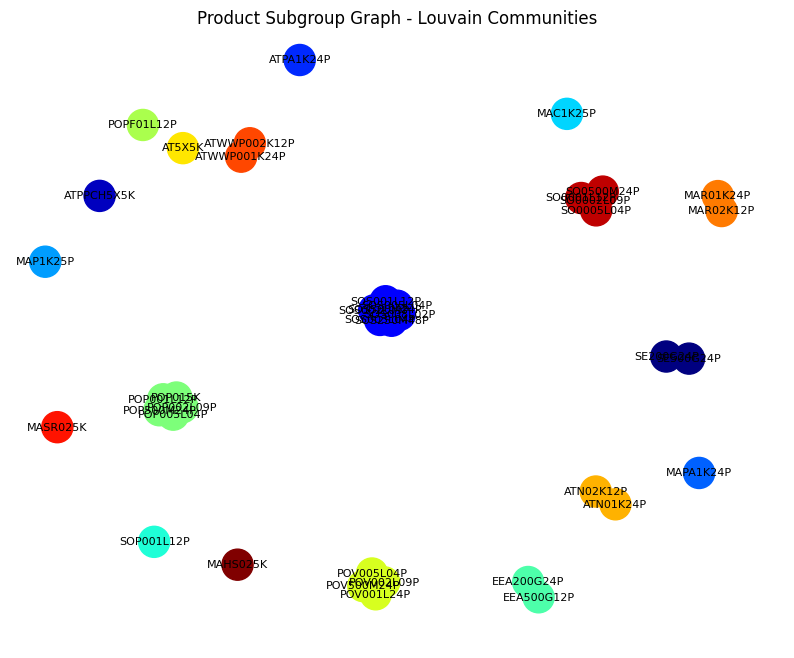

Product Subgroup Graph - Modularity Score: 0.7317708333333335


(0.7317708333333335,
 {'SOS008L02P': 2,
  'SOS005L04P': 2,
  'SOS003L04P': 2,
  'SOS002L09P': 2,
  'SOS001L12P': 2,
  'SOS500M24P': 2,
  'SOS250M48P': 2,
  'SOP001L12P': 7,
  'POV005L04P': 11,
  'POV002L09P': 11,
  'POV001L24P': 11,
  'POV500M24P': 11,
  'POP001L12P': 9,
  'POP015K': 9,
  'SO0005L04P': 17,
  'SO0002L09P': 17,
  'SO0001L12P': 17,
  'SO0500M24P': 17,
  'POP005L04P': 9,
  'POP002L09P': 9,
  'POP500M24P': 9,
  'POPF01L12P': 10,
  'AT5X5K': 12,
  'ATN02K12P': 13,
  'ATN01K24P': 13,
  'MAR02K12P': 14,
  'MAR01K24P': 14,
  'ATWWP002K12P': 15,
  'ATWWP001K24P': 15,
  'MASR025K': 16,
  'MAHS025K': 18,
  'SE500G24P': 0,
  'SE200G24P': 0,
  'ATPPCH5X5K': 1,
  'ATPA1K24P': 3,
  'MAPA1K24P': 4,
  'MAP1K25P': 5,
  'MAC1K25P': 6,
  'EEA500G12P': 8,
  'EEA200G24P': 8})

In [79]:
apply_louvain(graph_product_subgroup, "Product Subgroup Graph")


Here red nodes at centre are products in storage location, so these storage locations can form a community to optimize shippping and product management at warehouse.

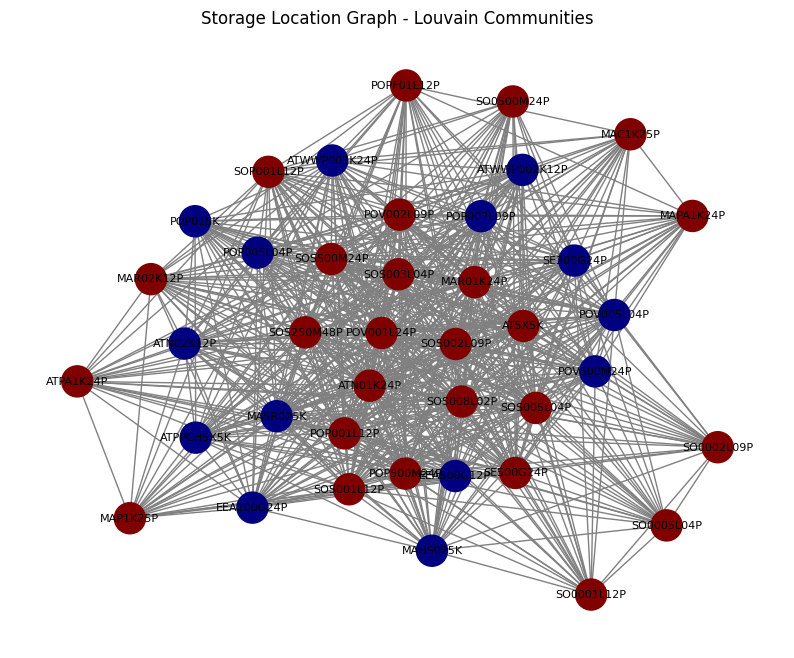

Storage Location Graph - Modularity Score: 0.024986149584487596


(0.024986149584487596,
 {'SOS008L02P': 1,
  'SOS005L04P': 1,
  'SOS003L04P': 1,
  'SOS002L09P': 1,
  'SOS001L12P': 1,
  'SOS500M24P': 1,
  'SOS250M48P': 1,
  'SOP001L12P': 1,
  'POV005L04P': 0,
  'POV002L09P': 1,
  'POV001L24P': 1,
  'POV500M24P': 0,
  'POP001L12P': 1,
  'POP015K': 0,
  'SO0005L04P': 1,
  'SO0002L09P': 1,
  'SO0001L12P': 1,
  'SO0500M24P': 1,
  'POP005L04P': 0,
  'POP002L09P': 0,
  'POP500M24P': 1,
  'POPF01L12P': 1,
  'AT5X5K': 1,
  'ATN02K12P': 0,
  'ATN01K24P': 1,
  'MAR02K12P': 1,
  'MAR01K24P': 1,
  'ATWWP002K12P': 0,
  'ATWWP001K24P': 0,
  'MASR025K': 0,
  'MAHS025K': 0,
  'SE500G24P': 1,
  'SE200G24P': 0,
  'ATPPCH5X5K': 0,
  'ATPA1K24P': 1,
  'MAPA1K24P': 1,
  'MAP1K25P': 1,
  'MAC1K25P': 1,
  'EEA500G12P': 0,
  'EEA200G24P': 0})

In [80]:
apply_louvain(graph_storage_location, "Storage Location Graph")


In [81]:
# Apply Girvan-Newman Algorithm
def apply_girvan_newman(graph, graph_name):
    communities = girvan_newman(graph)
    top_level_communities = next(communities)
    print(f"{graph_name} - Detected Communities: {list(top_level_communities)}")

    plt.figure(figsize=(10, 8))
    plt.title(f"{graph_name} - Girvan-Newman Communities")
    #colors = [partition[node] for node in graph.nodes()]
    colors = [i for i, community in enumerate(top_level_communities) for node in community]

    # Define pos here using a layout algorithm
    pos = nx.spring_layout(graph) # Get node positions for labels
    labels = nx.get_node_attributes(graph, 'label')  # Get and draw node labels
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=8)
    nx.draw(graph, pos=pos,  node_color=colors, cmap=plt.cm.jet, node_size=500, font_size=8)
    plt.savefig(f"{graph_name}_Girvan_Newman_communities.png")
    plt.show()


Plant Graph - Detected Communities: [{'POP002L09P', 'EEA500G12P', 'SOS003L04P', 'SOS001L12P', 'SOS250M48P', 'SOS005L04P', 'POP001L12P', 'EEA200G24P', 'SOS008L02P', 'SO0001L12P', 'SOP001L12P', 'POV001L24P', 'SOS002L09P', 'POV002L09P', 'POP005L04P', 'POV500M24P', 'POPF01L12P', 'SO0500M24P', 'SOS500M24P', 'SO0002L09P', 'POV005L04P', 'SO0005L04P', 'POP500M24P', 'POP015K'}, {'ATWWP001K24P', 'MAHS025K', 'ATPPCH5X5K', 'ATN01K24P', 'ATWWP002K12P', 'SE500G24P', 'ATN02K12P', 'MAPA1K24P', 'MASR025K', 'AT5X5K', 'MAP1K25P', 'MAC1K25P', 'SE200G24P', 'MAR01K24P', 'MAR02K12P', 'ATPA1K24P'}]


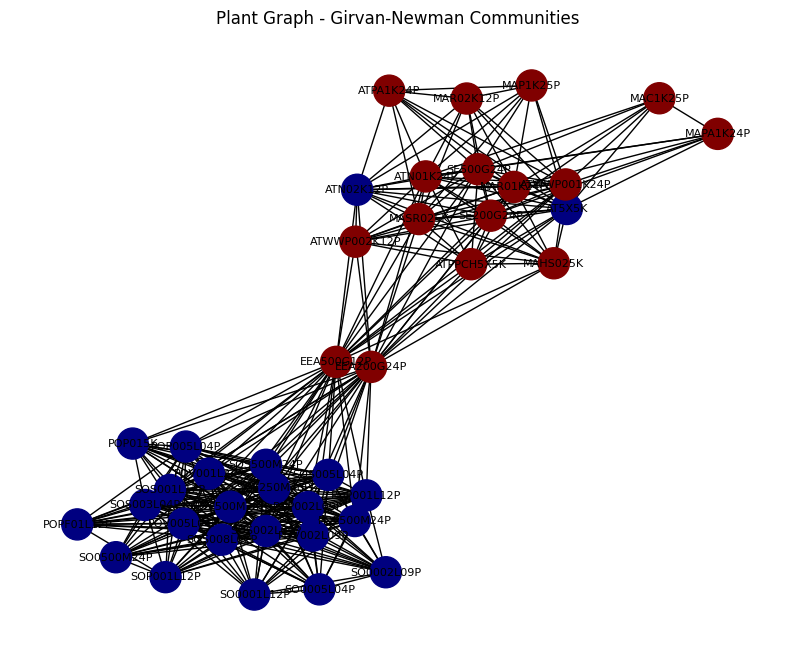

In [82]:
apply_girvan_newman(graph_plant, "Plant Graph")

Product Group Graph - Detected Communities: [{'SOS008L02P'}, {'SOS250M48P', 'SOS005L04P', 'SO0500M24P', 'SO0005L04P', 'SO0001L12P', 'SE500G24P', 'SOP001L12P', 'SOS500M24P', 'SE200G24P', 'SOS002L09P', 'SO0002L09P', 'SOS003L04P', 'SOS001L12P'}, {'POP001L12P', 'POPF01L12P', 'POV005L04P', 'POP002L09P', 'POV001L24P', 'POP005L04P', 'POV002L09P', 'POP500M24P', 'POV500M24P', 'POP015K'}, {'ATWWP001K24P', 'ATPPCH5X5K', 'ATWWP002K12P', 'ATN01K24P', 'ATN02K12P', 'AT5X5K', 'ATPA1K24P'}, {'MAHS025K', 'MAC1K25P', 'MAPA1K24P', 'MASR025K', 'MAP1K25P', 'MAR01K24P', 'MAR02K12P'}, {'EEA200G24P', 'EEA500G12P'}]


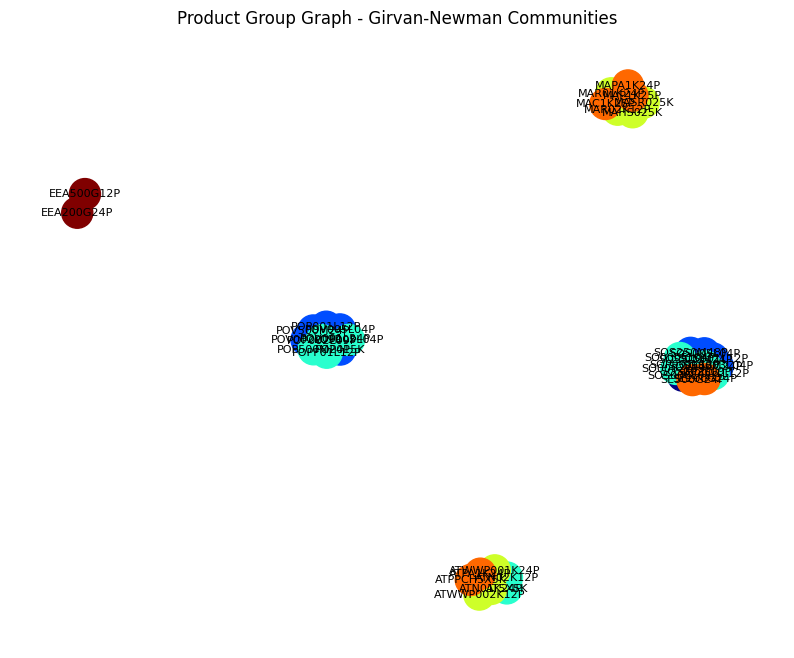

In [83]:
apply_girvan_newman(graph_product_group, "Product Group Graph")


Product Subgroup Graph - Detected Communities: [{'SOS008L02P'}, {'SOS250M48P', 'SOS005L04P', 'SOS500M24P', 'SOS002L09P', 'SOS003L04P', 'SOS001L12P'}, {'SOP001L12P'}, {'POV002L09P', 'POV500M24P', 'POV005L04P', 'POV001L24P'}, {'POP001L12P', 'POP002L09P', 'POP500M24P', 'POP005L04P', 'POP015K'}, {'SO0002L09P', 'SO0005L04P', 'SO0500M24P', 'SO0001L12P'}, {'POPF01L12P'}, {'AT5X5K'}, {'ATN02K12P', 'ATN01K24P'}, {'MAR02K12P', 'MAR01K24P'}, {'ATWWP001K24P', 'ATWWP002K12P'}, {'MASR025K'}, {'MAHS025K'}, {'SE200G24P', 'SE500G24P'}, {'ATPPCH5X5K'}, {'ATPA1K24P'}, {'MAPA1K24P'}, {'MAP1K25P'}, {'MAC1K25P'}, {'EEA200G24P', 'EEA500G12P'}]


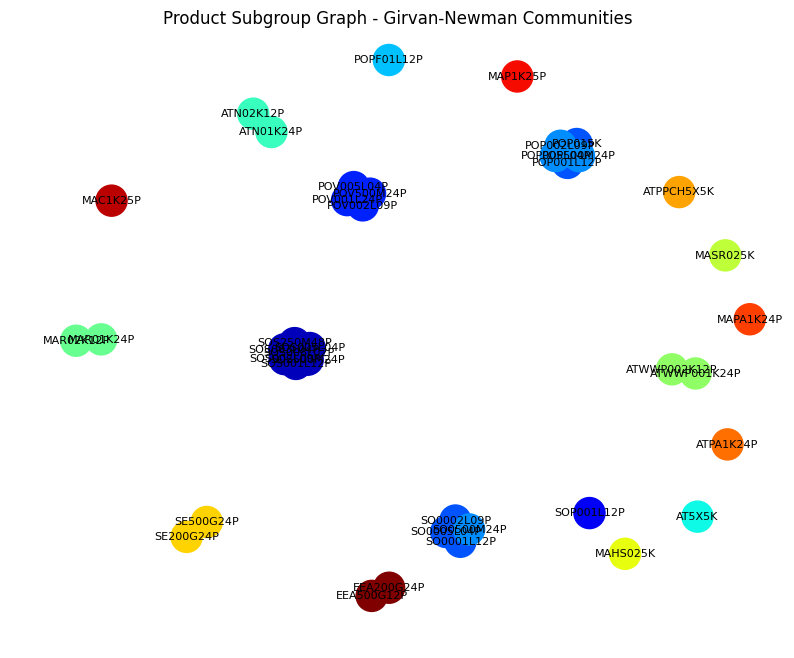

In [84]:
apply_girvan_newman(graph_product_subgroup, "Product Subgroup Graph")


red node storage location is bottle neck ..critical in supply chain

Storage Location Graph - Detected Communities: [{'ATPPCH5X5K', 'POP002L09P', 'MAPA1K24P', 'AT5X5K', 'EEA500G12P', 'SE200G24P', 'SOS003L04P', 'SOS001L12P', 'ATWWP001K24P', 'SOS005L04P', 'POP001L12P', 'SOS250M48P', 'EEA200G24P', 'MAHS025K', 'SOS008L02P', 'SO0001L12P', 'SOP001L12P', 'MAR01K24P', 'POV001L24P', 'SOS002L09P', 'POV002L09P', 'POP005L04P', 'MAR02K12P', 'ATPA1K24P', 'POV500M24P', 'POPF01L12P', 'SO0500M24P', 'ATWWP002K12P', 'ATN02K12P', 'MAC1K25P', 'MASR025K', 'SOS500M24P', 'SO0002L09P', 'POV005L04P', 'ATN01K24P', 'SO0005L04P', 'SE500G24P', 'POP500M24P', 'POP015K'}, {'MAP1K25P'}]


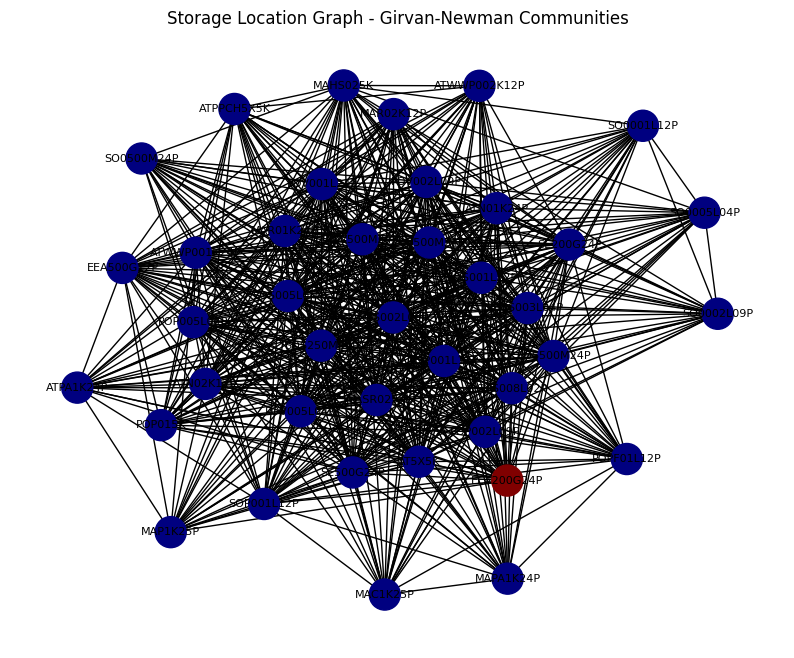

In [85]:
apply_girvan_newman(graph_storage_location, "Storage Location Graph")

In [86]:
# Compute centrality measures
def compute_centrality(graph, graph_name):
    degree_centrality = nx.degree_centrality(graph)
    closeness_centrality = nx.closeness_centrality(graph)
    betweenness_centrality = nx.betweenness_centrality(graph)
    eigenvector_centrality = nx.eigenvector_centrality(graph, max_iter=1000)

    print(f"{graph_name} - Centrality Measures:\n")
    print("a.Degree Centrality:", degree_centrality)
    print("b.Closeness Centrality:", closeness_centrality)
    print("c.Betweenness Centrality:", betweenness_centrality)
    print("d.Eigenvector Centrality:", eigenvector_centrality)

compute_centrality(graph_plant, "1.Plant Graph")
compute_centrality(graph_product_group, "\n2.Product Group Graph")
compute_centrality(graph_product_subgroup, "\n3.Product Subgroup Graph")
compute_centrality(graph_storage_location, "\n4.Storage Location Graph")

1.Plant Graph - Centrality Measures:

a.Degree Centrality: {'SOS008L02P': 0.5897435897435898, 'SOS005L04P': 0.5897435897435898, 'SOS003L04P': 0.5897435897435898, 'SOS002L09P': 0.5897435897435898, 'SOS001L12P': 0.5897435897435898, 'SOS500M24P': 0.5897435897435898, 'SOS250M48P': 0.5897435897435898, 'SOP001L12P': 0.4358974358974359, 'POV005L04P': 0.5897435897435898, 'POV002L09P': 0.5897435897435898, 'POV001L24P': 0.5897435897435898, 'POV500M24P': 0.5897435897435898, 'POP001L12P': 0.5897435897435898, 'POP015K': 0.4358974358974359, 'SO0005L04P': 0.41025641025641024, 'SO0002L09P': 0.41025641025641024, 'SO0001L12P': 0.41025641025641024, 'SO0500M24P': 0.41025641025641024, 'POP005L04P': 0.5128205128205128, 'POP002L09P': 0.5897435897435898, 'POP500M24P': 0.5897435897435898, 'POPF01L12P': 0.41025641025641024, 'AT5X5K': 0.4358974358974359, 'ATN02K12P': 0.3846153846153846, 'ATN01K24P': 0.4358974358974359, 'MAR02K12P': 0.2564102564102564, 'MAR01K24P': 0.4358974358974359, 'ATWWP002K12P': 0.3076923076

In [96]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# Function to apply and visualize centrality measures
def visualize_centrality(G, centrality_type, title):
    plt.figure(figsize=(10, 8))

    # Calculate centrality based on the specified type
    if centrality_type == 'degree':
        centrality = nx.degree_centrality(G)
    elif centrality_type == 'betweenness':
        centrality = nx.betweenness_centrality(G)
    elif centrality_type == 'closeness':
        centrality = nx.closeness_centrality(G)
    elif centrality_type == 'eigenvector':
        centrality = nx.eigenvector_centrality(G, max_iter=1000)
    else:
        raise ValueError("Invalid centrality type specified.")

    # Normalize centrality values for color mapping
    norm = colors.Normalize(vmin=min(centrality.values()), vmax=max(centrality.values()))
    cmap = cm.viridis
    sm = cm.ScalarMappable(norm=norm, cmap=cmap)

    # Convert centrality to node sizes and colors
    node_size = [v * 1000 for v in centrality.values()]
    node_color = [cmap(norm(v)) for v in centrality.values()]

    # Draw graph with centrality values
    pos = nx.spring_layout(G)
    labels = nx.get_node_attributes(graph, 'label')  # Get and draw node labels
    nx.draw_networkx_labels(graph, pos, labels=labels, font_size=8)
    nx.draw(G, pos=pos, node_size=node_size, node_color=node_color, cmap=cmap, edge_color="gray")

    # Add colorbar
    cbar = plt.colorbar(sm, ax=plt.gca(), shrink=0.7)
    cbar.set_label("Centrality Value")

    plt.title(title)
    plt.show()

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


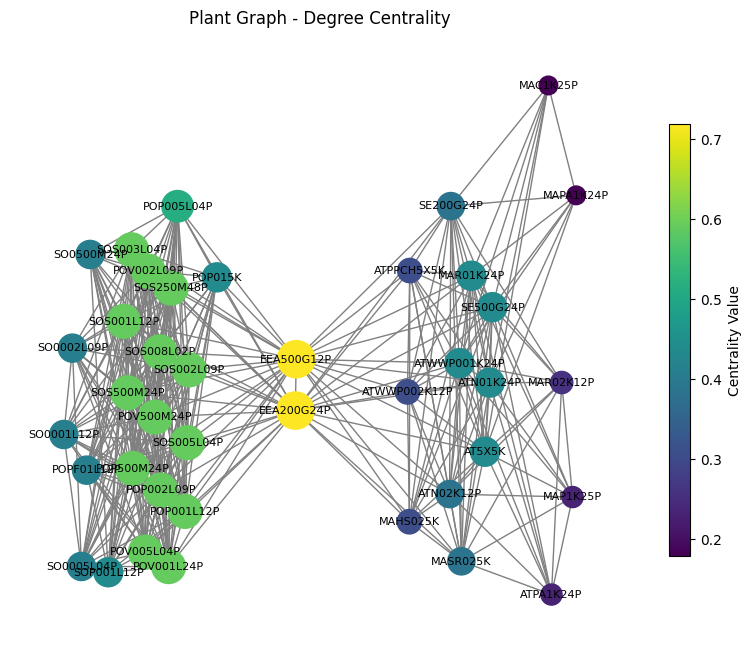

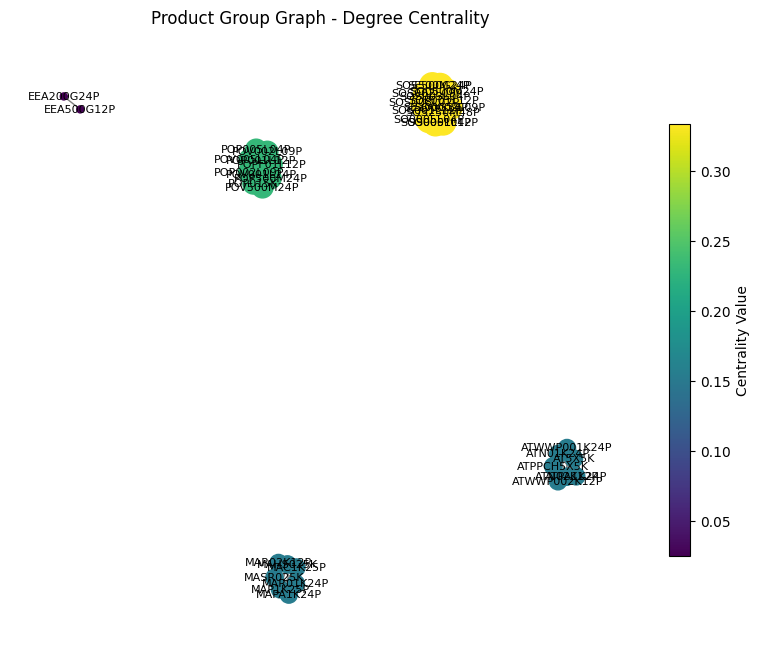

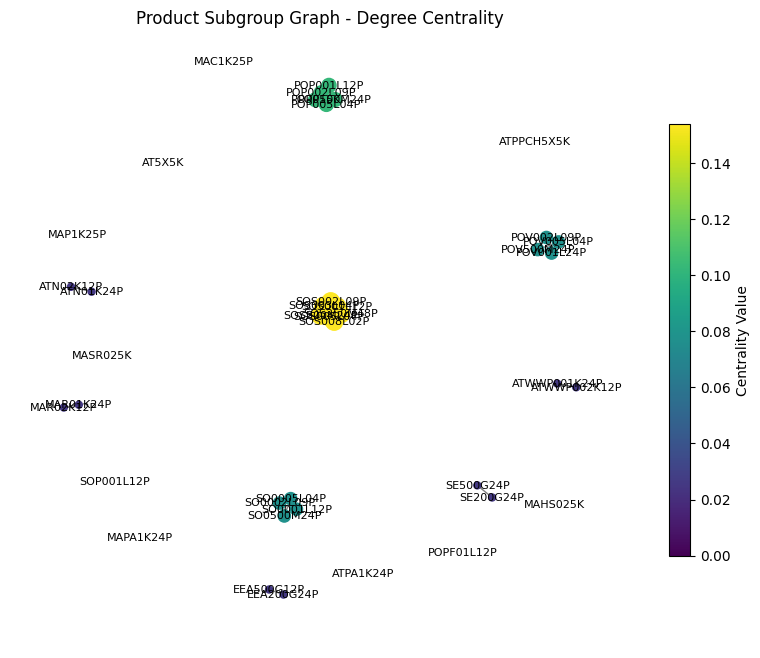

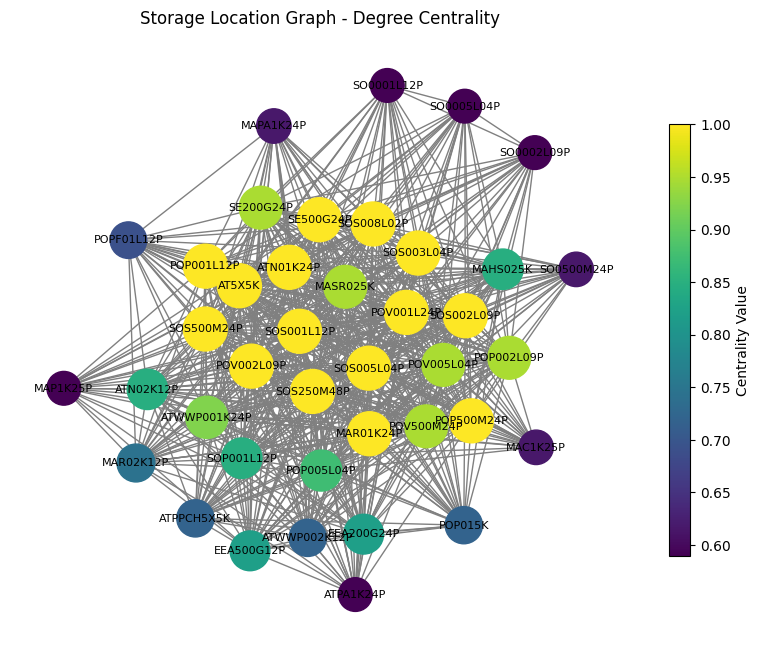

In [97]:
# Degree Centrality Graphs
for graph, name in [(graph_plant, "Plant Graph"), (graph_product_group, "Product Group Graph"),
                    (graph_product_subgroup, "Product Subgroup Graph"), (graph_storage_location, "Storage Location Graph")]:


    visualize_centrality(G=graph, centrality_type = "degree", title=f"{name} - Degree Centrality")

/usr/local/lib/python3.11/dist-packages/networkx/drawing/nx_pylab.py:457: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


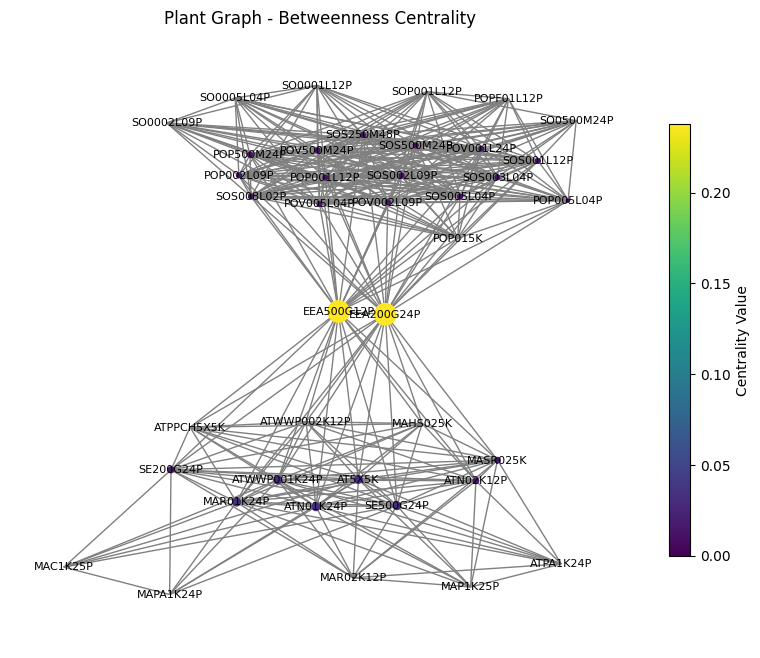

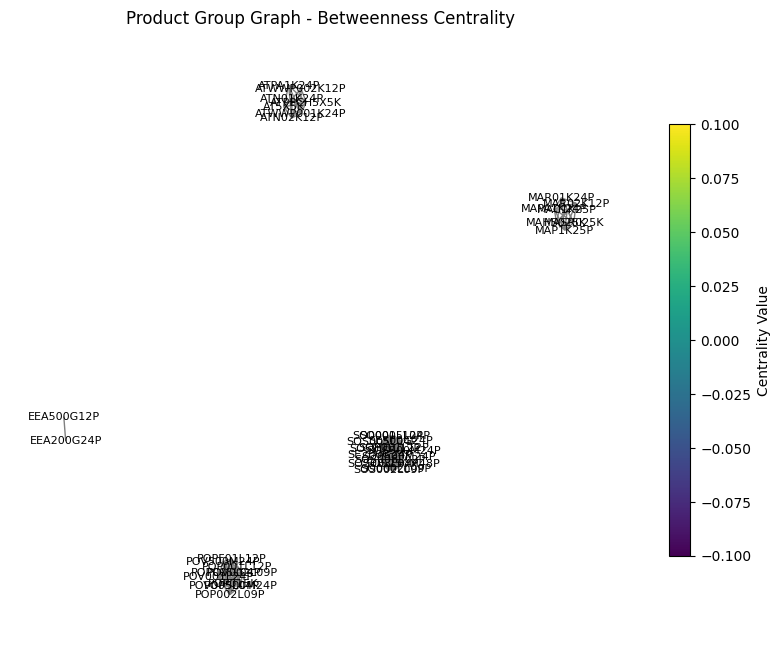

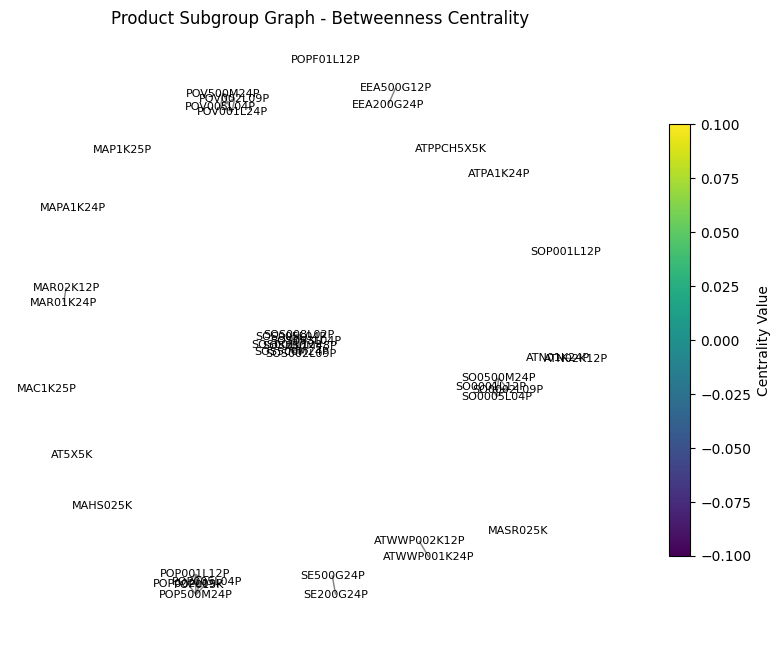

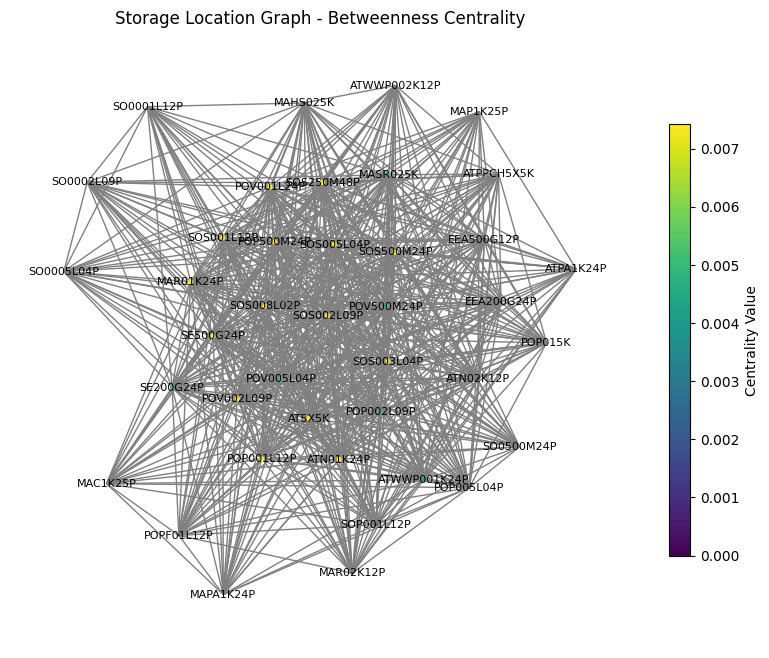

In [98]:
# Betweenness Centrality Graphs
for graph, name in [(graph_plant, "Plant Graph"), (graph_product_group, "Product Group Graph"),
                    (graph_product_subgroup, "Product Subgroup Graph"), (graph_storage_location, "Storage Location Graph")]:


    visualize_centrality(G=graph, centrality_type = 'betweenness', title=f"{name} - Betweenness Centrality")

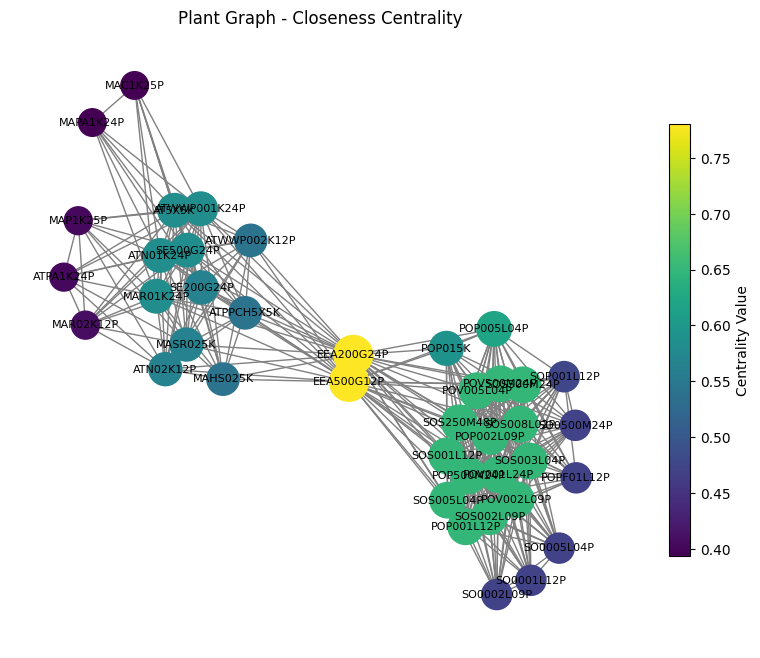

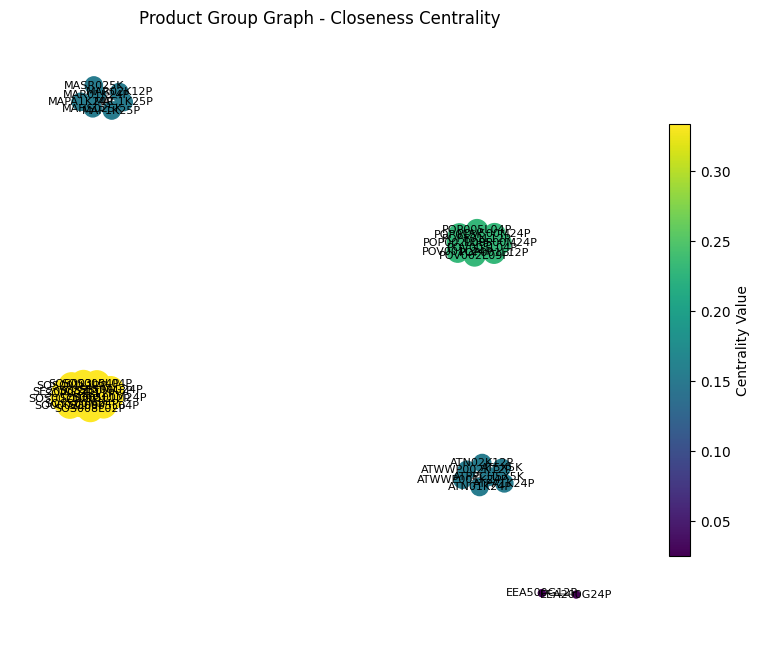

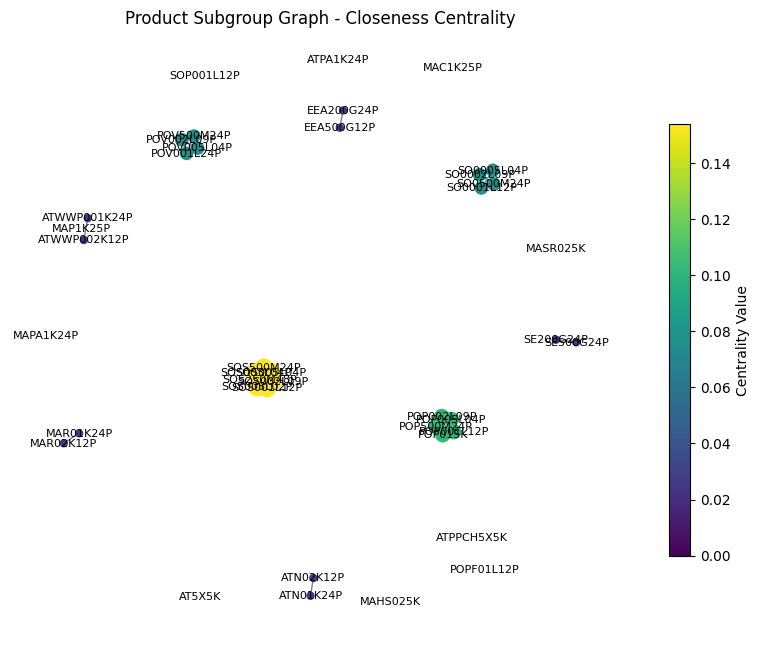

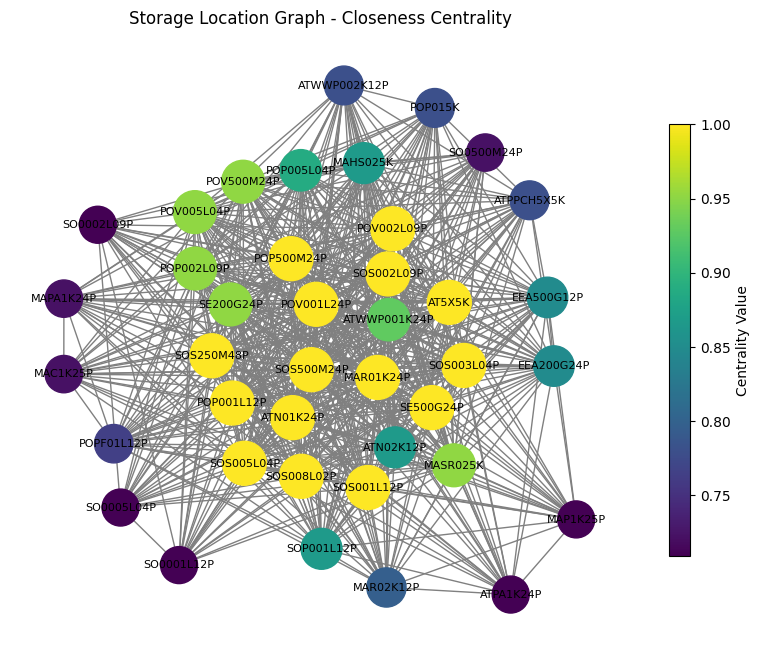

In [105]:
# Closeness Centrality Graphs
for graph, name in [(graph_plant, "Plant Graph"), (graph_product_group, "Product Group Graph"),
                    (graph_product_subgroup, "Product Subgroup Graph"), (graph_storage_location, "Storage Location Graph")]:

    visualize_centrality(graph, centrality_type="closeness", title=f"{name} - Closeness Centrality")

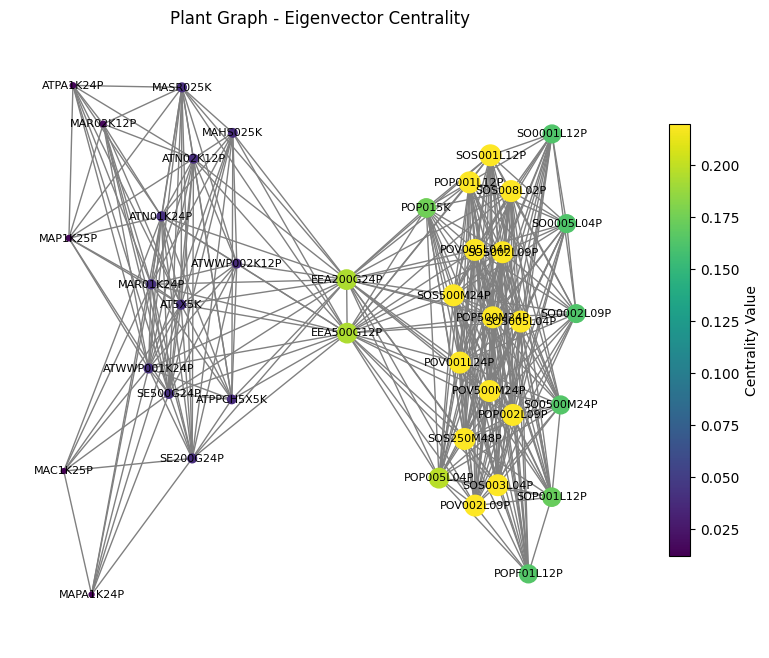

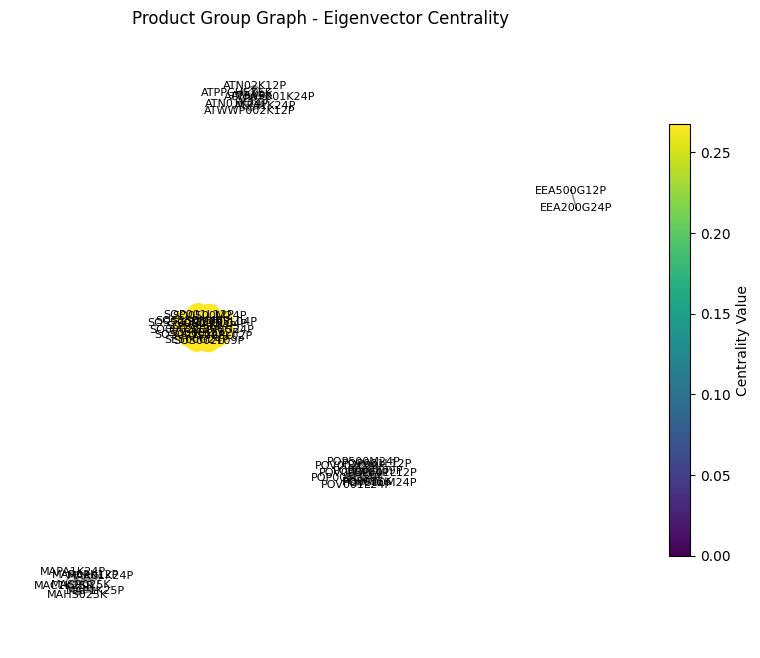

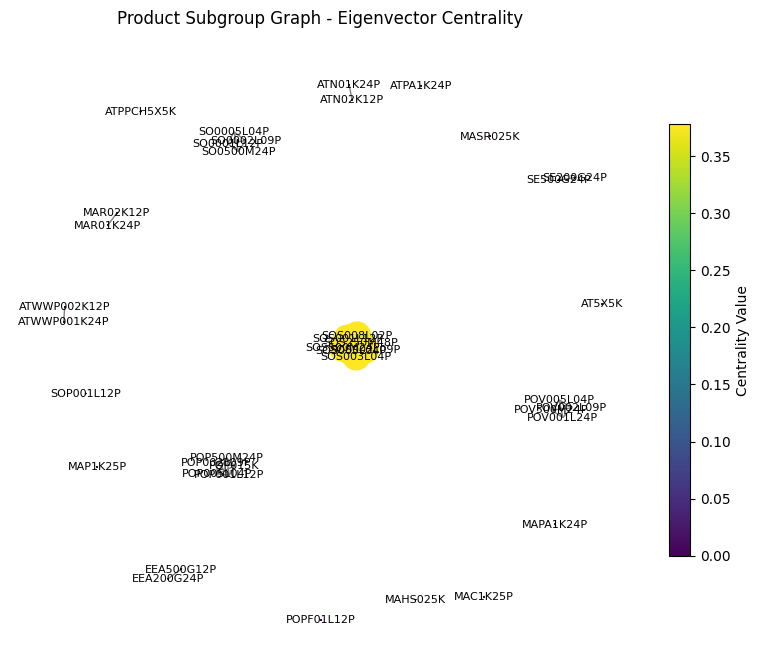

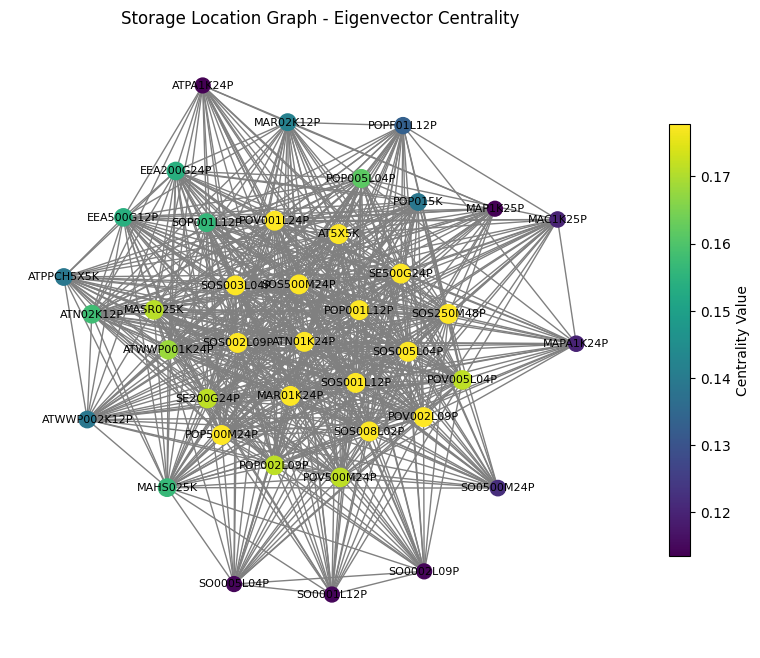

In [110]:
# Eigen-Vector Centrality Graphs
for graph, name in [(graph_plant, "Plant Graph"), (graph_product_group, "Product Group Graph"),
                    (graph_product_subgroup, "Product Subgroup Graph"), (graph_storage_location, "Storage Location Graph")]:

    visualize_centrality(graph, centrality_type='eigenvector', title=f"{name} - Eigenvector Centrality")

In [111]:
# Save all graphs for Gephi
nx.write_gexf(graph_plant, "plant_graph.gexf")
nx.write_gexf(graph_product_group, "product_group_graph.gexf")
nx.write_gexf(graph_product_subgroup, "product_subgroup_graph.gexf")
nx.write_gexf(graph_storage_location, "storage_location_graph.gexf")